<a href="https://colab.research.google.com/github/jongwoonalee/jongwoonalee.github.io/blob/main/Part1_Rendering_a_Lambertian_sphere.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the library


In [1]:
# Import the library
import matplotlib as mpl  # For general matplotlib functions
import numpy as np  # For numerical calculations
import matplotlib.pyplot as plt  # For plotting

# Libraries for animation (only used for bonus part)
from math import cos, sin  # For trig calculations
from matplotlib.animation import FuncAnimation  # For animations
from IPython.display import HTML  # For notebook display

#Sphere
We want to create a picture of a shaded sphere like in the lecture slides, which means we need to first define a spherical surface. Let us assume that it has a radius of r=100.

You can now define the surface as a parametrization of z-values using z= z(x,y), which determines the points that satisfy the condition of being on the sphere.

The full set of points on the surface is easily defined using np.linspace then! Please take only one hemisphere (the positive one).




In [2]:
# Setting up sphere with radius = 100 as specified in the assignment
r = 100

# Creating the surface points for the sphere
# Need enough points for a smooth sphere, 1000 gives good resolution
x = np.linspace(-r, r, 1000)  # X-axis points from -100 to 100

# Same for Y-axis
y = np.linspace(-r, r, 1000)  # Y-axis points

# Create a grid of all (x,y) combinations
# This gives us a 1000x1000 grid of coordinates
X, Y = np.meshgrid(x, y)

# Calculate Z values using the sphere equation: r^2 = x^2 + y^2 + z^2
# Rearranged to: z^2 = r^2 - x^2 - y^2
Z_square = r**2 - X**2 - Y**2

# Need to handle points outside the sphere where z^2 would be negative
# Mark these invalid points
mask = Z_square <= 0

# Set invalid points to NaN so we can ignore them later
Z_square[mask] = np.nan

# Take the square root to get actual Z values
# This gives us the upper hemisphere only (positive Z values)!!
Z = np.sqrt(Z_square)

# Replace NaNs with zeros for easier visualization
Z = np.nan_to_num(Z, nan=0)


According to the cosine-law, the intensity at each point is the dot-product of the normal of the surface with the lighting direction.

The normal n=[nx,ny,nz] is the cross-product of the partial derivatives of the sphere parametrization with respect to x and y and is given by
[𝑛 =− ∂𝑧(𝑥,𝑦) , 𝑛 =− ∂𝑧(𝑥,𝑦) , 𝑛 = 1]/||n|| 𝑥 ∂𝑥 𝑦 ∂𝑦 𝑧

Calculate these derivatives BY HAND by deriving the function z(x,y) BY HAND and insert them into your code. Do not forget to normalize the vector!

In [3]:
# Calculate partial derivative of z with respect to x
# From r^2 = x^2 + y^2 + z^2, we get dz/dx = -x/z
def partial_derivative_x(x, y, r):
    # Calculate z^2 values
    Z_square = r**2 - x**2 - y**2

    # Handle invalid points outside sphere
    Z_square[Z_square <= 0] = np.nan

    # Get z values
    z_value = np.sqrt(Z_square)

    # Replace NaNs with 1 to avoid division by zero
    z_value = np.nan_to_num(z_value, nan=1)

    # Return the partial derivative: dz/dx = -x/z
    return -x / z_value


# Calculate partial derivative of z with respect to y
# From the same equation: dz/dy = -y/z
def partial_derivative_y(x, y, r):
    # Calculate z^2 values
    Z_square = r**2 - x**2 - y**2

    # Handle invalid points
    Z_square[Z_square <= 0] = np.nan

    # Get z values
    z_value = np.sqrt(Z_square)

    # Avoid division by zero
    z_value = np.nan_to_num(z_value, nan=1)

    # Return the partial derivative: dz/dy = -y/z
    return -y / z_value


# Calculate normal vectors at each point on the sphere
# Normal vector components from the assignment: n = [-dz/dx, -dz/dy, 1]/||n||

# X-component of normal vector
px = partial_derivative_x(X, Y, r)

# Y-component of normal vector
py = partial_derivative_y(X, Y, r)

# Z-component is always 1 (pointing outward)
pz = np.ones_like(Z)

# Normalize the normal vectors to unit length
norm = np.sqrt(px**2 + py**2 + pz**2)
px /= norm
py /= norm
pz /= norm

Using the illumination direction of I = (0.13,0,0.94), calculate the shaded sphere and insert code to plot the final result.
Tip: You may need to mask out pixels if you plot a larger region!

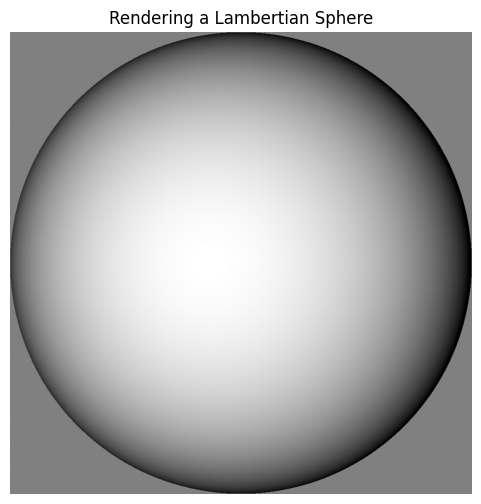

In [4]:

# Using the specified illumination direction I = (0.13, 0, 0.94)
imn_sphere = np.array([0.13, 0, 0.94])

# Normalize illumination vector
imn_sphere = imn_sphere / np.linalg.norm(imn_sphere)

# Calculate illumination intensity using the cosine law (dot product)
# intensity = n·I = px*I[0] + py*I[1] + pz*I[2]
Intensity_static = px * imn_sphere[0] + py * imn_sphere[1] + pz * imn_sphere[2]

# Clamp intensity values to valid range [0,1]
Intensity_static = np.clip(Intensity_static, 0, 1)

# Set the background (masked areas) to gray (0.5)
Intensity_static[mask] = 0.5

# Visualize the sphere
plt.figure(figsize=(6, 6))

# Plot the image:
# - Black (0): No light
# - White (1): Full light
# - Gray (0.5): Background
plt.imshow(Intensity_static, cmap='gray', extent=[-r, r, -r, r])

# Hide axes for cleaner visualization
plt.axis('off')

# Add title
plt.title('Rendering a Lambertian Sphere')

# Display the result
plt.show()




Bonus (10 points): Insert code that creates an animation with a moving light source that moves around the sphere with 30 different frames [in any way you like]! You are allowed to import further libraries for this, of course.

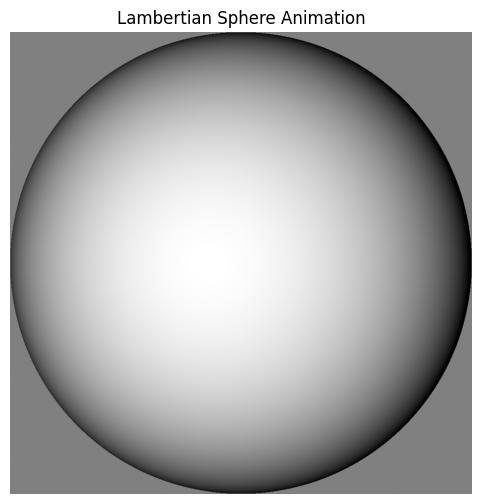

In [5]:

# Create animation with 30 frames as specified
num_frames = 30

# Function to update each frame of animation
def update(frame):
    # Clear previous frame
    ax.clear()

    # Calculate rotation angle for this frame
    theta = 2 * np.pi * frame / num_frames

    # Create rotating illumination vector
    # Light source moves in circular path
    Ix = 0.13 * cos(theta)  # X component
    Iy = 0.13 * sin(theta)  # Y component
    Iz = 0.94               # Z component stays constant

    # Combine into vector
    I = np.array([Ix, Iy, Iz])

    # Normalize the illumination vector
    I = I / np.linalg.norm(I)

    # Calculate new intensity values with updated light direction
    Intensity = px * I[0] + py * I[1] + pz * I[2]

    # Clamp to valid range
    Intensity = np.clip(Intensity, 0, 1)

    # Create copy for masking
    Intensity_masked = Intensity.copy()

    # Set background to gray
    Intensity_masked[mask] = 0.5

    # Display the updated image
    ax.imshow(Intensity_masked, cmap='gray', extent=[-r, r, -r, r])

    # Hide axes
    ax.axis('off')

    # Add title
    ax.set_title('Lambertian Sphere Animation')

# Create figure and axis objects for animation
fig, ax = plt.subplots(figsize=(6, 6))

# Generate the animation
sphere_animation = FuncAnimation(fig, update, frames=num_frames, interval=100, repeat=True)

# Display animation in notebook
HTML(sphere_animation.to_jshtml())